In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('AAPL.csv')
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,79.117142,79.285713,77.375717,78.432854,68.687538,140129500
1,2013-01-03,78.268570,78.524284,77.285713,77.442856,67.820526,88241300
2,2013-01-04,76.709999,76.947144,75.118568,75.285713,65.931404,148583400
3,2013-01-07,74.571426,75.614288,73.599998,74.842857,65.543602,121039100
4,2013-01-08,75.601425,75.984283,74.464287,75.044289,65.719994,114676800


In [12]:
data.shape

(1259, 7)

In [13]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

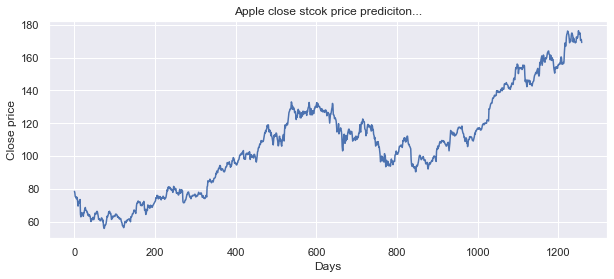

In [14]:
sns.set()
plt.figure(figsize=(10,4))
plt.title("Apple close stcok price prediciton...")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.plot(data['Close'])
plt.show()

In [15]:
#to get close price
close = data[["Close"]]
close.head(5)

,Close
0,78.432854
1,77.442856
2,75.285713
3,74.842857
4,75.044289


In [16]:
future_days = 25
close["Prediction"] = close[["Close"]].shift(-future_days)
close.head(5)

<ipython-input-16-24f5f2f8f343>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close["Prediction"] = close[["Close"]].shift(-future_days)


,Close,Prediction
0,78.432854,66.888573
1,77.442856,67.854286
2,75.285713,68.561432
3,74.842857,66.842857
4,75.044289,66.715714


In [17]:
X = np.array(close.drop(["Prediction"],1))[:-future_days]
Y = np.array(close["Prediction"])[:-future_days]

In [19]:
X.shape

(1234, 1)

In [20]:
Y.shape

(1234,)

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)

In [22]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(xtrain,ytrain)

LinearRegression()

In [23]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [24]:
xfuture = close.drop(["Prediction"],1)[:-future_days]
xfuture = xfuture.tail(future_days)
xfuture = np.array(xfuture)
print(xfuture)

[[155.979996]
 [156.25    ]
 [156.169998]
 [157.100006]
 [156.410004]
 [157.410004]
 [163.050003]
 [166.720001]
 [169.039993]
 [166.889999]
 [168.110001]
 [172.5     ]
 [174.25    ]
 [174.809998]
 [176.240005]
 [175.880005]
 [174.669998]
 [173.970001]
 [171.339996]
 [169.080002]
 [171.100006]
 [170.149994]
 [169.979996]
 [173.139999]
 [174.960007]]


In [25]:
ypred_LR = LR.predict(xfuture)

In [26]:
ypred_DTR = DTR.predict(xfuture)

<ipython-input-31-a88e5d7c0f97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Prediction"] = DTR_pred


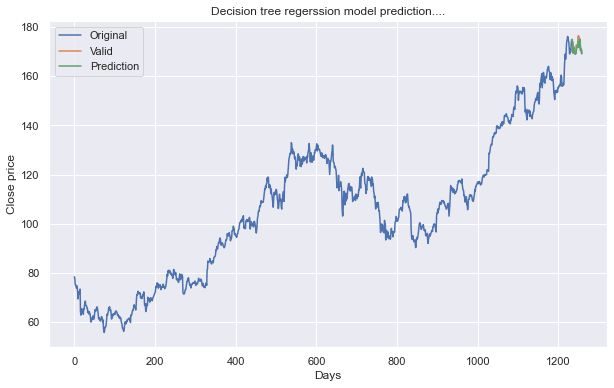

In [31]:
DTR_pred = ypred_DTR
valid = data[X.shape[0]:]
valid["Prediction"] = DTR_pred
#print(valid)
plt.figure(figsize=(10,6))
plt.title("Decision tree regerssion model prediction....")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.plot(data["Close"])
plt.plot(valid[["Close","Prediction"]])
plt.legend(["Original","Valid","Prediction"])
plt.show()

<ipython-input-32-19ebb937cb15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Prediction"] = LR_pred


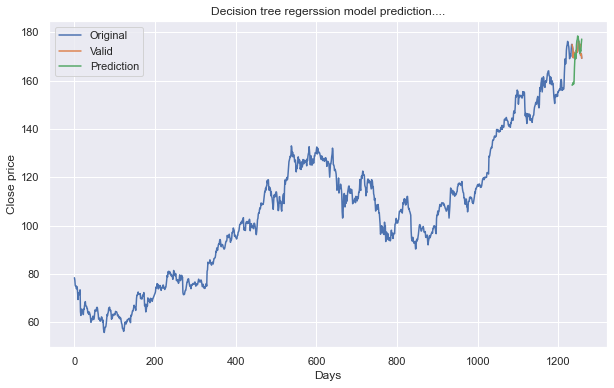

In [32]:
LR_pred = ypred_LR
valid = data[X.shape[0]:]
valid["Prediction"] = LR_pred
#print(valid)
plt.figure(figsize=(10,6))
plt.title("Decision tree regerssion model prediction....")
plt.xlabel("Days")
plt.ylabel("Close price")
plt.plot(data["Close"])
plt.plot(valid[["Close","Prediction"]])
plt.legend(["Original","Valid","Prediction"])
plt.show()